In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/",one_hot=False)
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

print(y_train[:10])

print(x_train.shape)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[7 3 4 6 1 8 1 0 9 8]
(55000, 784)


In [2]:
n_inputs = 28*28  # MNIST
n_hidden1 = 500

n_outputs = 10
learning_rate = 0.01

tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
y = tf.placeholder(tf.int32, shape=(None), name="y")


# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_inputs, n_hidden1])),
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden1])),
    'out': tf.Variable(tf.random_normal([n_hidden1, n_outputs]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden1])),
    'out': tf.Variable(tf.random_normal([n_outputs]))
}


# Create model
def neural_net(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b1']))
    out_layer = tf.add(tf.matmul(layer_2, weights['out']),biases['out'])
    return out_layer

logits=neural_net(x)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

y_pred=tf.argmax(tf.nn.softmax(logits),1)
init = tf.global_variables_initializer()

In [3]:
session = tf.Session()
session.run(init)

print(session.run(weights['h1']))
print(session.run(weights['out']))

saver = tf.train.Saver()

n_epochs = 10
batch_size = 50

for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        session.run(training_op, feed_dict={x: X_batch, y: y_batch})
    acc_train = session.run(accuracy,feed_dict={x: X_batch, y: y_batch})
    acc_test = session.run(accuracy,feed_dict={x: x_test, y: y_test})
    print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    #print(session.run(weights['out']))
save_path = saver.save(session, "models/ann_final.ckpt")

[[-1.9490782  -0.09050789 -1.028579   ...,  0.16367616  0.20320557
  -0.37227884]
 [ 1.48119473  0.05844649 -0.01930961 ..., -0.77872777  0.89223772
  -0.77869785]
 [-0.23355654 -1.43598664  0.63015658 ..., -0.3187179   0.06657539
   1.24643338]
 ..., 
 [ 0.77279347  1.60306108  0.76055354 ..., -2.53107047  0.90506959
  -0.1515445 ]
 [ 1.01379538  0.56812149 -1.15420663 ..., -1.0554775  -1.12567139
   1.22673225]
 [ 1.01276183 -0.77486658  0.78975958 ...,  0.05539242  2.48688769
  -0.64421326]]
[[ 1.72961032  0.23522188 -0.42115936 ..., -0.37156811 -0.29385343
   1.03912592]
 [ 0.57877147 -0.13703623  0.60205412 ..., -1.19744563 -1.3690815
  -0.5749433 ]
 [ 0.07238838  0.61237812 -0.11987276 ..., -1.95239174 -1.33797681
   1.32151687]
 ..., 
 [-0.55787563  1.04106724  0.71556073 ..., -1.52708459 -0.77064079
   0.78119123]
 [ 0.03722174  0.24532999  0.03423243 ..., -0.68687952  0.4178305
   0.29192299]
 [ 1.11446106  2.02910709 -2.42288923 ...,  0.02859091  0.9048233
  -0.22888698]]
0 T

In [4]:
print(session.run(weights['h1']))
print(session.run(weights['out']))


[[-1.9490782  -0.09050789 -1.028579   ...,  0.16367616  0.20320557
  -0.37227884]
 [ 1.48119473  0.05844649 -0.01930961 ..., -0.77872777  0.89223772
  -0.77869785]
 [-0.23355654 -1.43598664  0.63015658 ..., -0.3187179   0.06657539
   1.24643338]
 ..., 
 [ 0.77279347  1.60306108  0.76055354 ..., -2.53107047  0.90506959
  -0.1515445 ]
 [ 1.01379538  0.56812149 -1.15420663 ..., -1.0554775  -1.12567139
   1.22673225]
 [ 1.01276183 -0.77486658  0.78975958 ...,  0.05539242  2.48688769
  -0.64421326]]
[[ 1.69077575  0.16812265 -0.41947716 ..., -0.4824678  -0.29664937
   1.00962043]
 [ 0.49844807 -0.13013525  0.80676562 ..., -1.426373   -1.22138536
  -0.94535005]
 [ 0.0289442   0.5662353  -0.07758452 ..., -1.90112197 -1.26389396
   1.14746368]
 ..., 
 [-0.69861138  1.10174155  0.64326829 ..., -1.4441855  -0.72143114
   0.81032687]
 [-0.03765244  0.28603664  0.06127573 ..., -0.7359603   0.45386949
   0.28063753]
 [ 1.1237359   1.89784157 -2.31090283 ..., -0.11346177  0.83574325
  -0.31824163]]


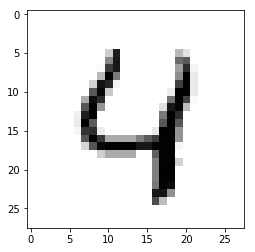

[4]
[7 2 1 0 4 1 4 9 6 9 0 8 9 0 1 5 9 7 3 4 9 6 4 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 6 1 1 7 4 8 2 5 3 2 4 4 6 3 5 5 6 0 4 1 9 7 7 8 2 3 7 4 3 4 3 0 7 0 3 7
 1 7 3 2 9 7 9 6 2 7 8 4 7 5 6 1 3 6 9 3 1 4 1 3 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [5]:
import matplotlib.pyplot as plt

xt=x_test[4:5]
plt.imshow(xt.reshape((28,28)), cmap='binary')
plt.show()
print(y_test[4:5])

#print(xt.shape)

xt=x_test[:100]
yt=session.run(y_pred,feed_dict={x: xt})
print(yt)

print(y_test[:100])